In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading complete csv file into a panda dataframe whih is named as data 
# As observed there is no headder column in the given data, 
#so we have assumed and given a name for each column in the given data 

data = pd.read_csv("data.csv",
                  names = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11', 
                           's12', 's13', 's14', 's15', 's16','s17', 's18', 's19', 's20', 's21', 
                           's22', 's23', 's24', 's25', 's26','s27', 's28', 's29', 's30','s31', 
                           's32', 's33', 's34', 's35', 's36','s37', 's38', 's39', 's40','s41','s42'])


In [ ]:
# Outlier Treatment 
# Here we are using IQR method to remove the outliers


In [3]:
quartile1 = data.quantile(0.25)
quartile3 = data.quantile(0.75)
IQR = quartile3 - quartile1
## lets use the above formula to remove the outliers and filter the dataset..
outlier_removed_data = data[~((data < (quartile1 - 1.5 * IQR)) | (data > (quartile3 + 1.5 * IQR))).any(axis=1)]


In [4]:
print("Given data shape : ", data.shape)
print("outliers removed data shape : ", outlier_removed_data.shape)

Given data shape :  (20854, 42)
outliers removed data shape :  (7381, 42)


In [ ]:
# As observed, If we tries to remove the outlier we will end up with only 35% of data which is not a good move.


In [8]:
# As we know s24 is the target field, So we will seperate target field and write it in other file
y  = data['s42']
del data['s42']
X=data
# This says, we have target field in y data frame and rest of the features in X data frame.


In [11]:
from sklearn.cross_validation import train_test_split
# Split data into Test & Training set where test data is 30% & raining data is 70%
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2018)


In [12]:
# Feature Scaling
# Here we using StandardScaler which will scale all the numeric fields and ranges between -1 to +1 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [13]:
# As we seen there are 41 different features, 
#here we can implement PCA to reduce the dimensionality of the test and train data 
from sklearn.decomposition import PCA
# Make an instance of the Model 
# We can consider the variability till 95%
pca = PCA(.95)

#Fit the training data
pca.fit(x_train)
pca.fit(x_test)
#transofrm the test & training data
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
#Checking the dimensions after the PCA

print(x_train_pca.shape)
print(x_test_pca.shape)


(14597, 10)
(6257, 10)


In [ ]:
# As we seen ther are 41 features, now after PCA we have only 10 features which are creating upto 95% of variance 


In [14]:
#Default Hyperparameters
# Let's first fit a random forest model with default hyperparameters.
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [16]:
# fit
rfc.fit(x_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
# Making predictions
predictions = rfc.predict(x_test_pca)

In [18]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score


In [19]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.47      0.47      0.47      2630
          1       0.62      0.62      0.62      3627

avg / total       0.56      0.56      0.56      6257



In [20]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[1243 1387]
 [1375 2252]]


In [21]:
print(accuracy_score(y_test,predictions))

0.5585743966757232


In [ ]:
# As we seen we have 56% of accuracy
# This accuracy we got with the default hyperparameters. 
#We will try to tweek the hyparameters and check the accuracy. 


In [ ]:
#Tuning max_depth
#Let's try to find the optimum values for max_
#depth and understand how the value of max_depth impacts the overall accuracy of the ensemble.



In [22]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(x_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [23]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.065109,0.002586,0.565596,0.567805,2,{'max_depth': 2},4,0.564041,0.567183,0.565411,...,0.570058,0.570389,0.563207,0.566964,0.565262,0.568933,0.002053,0.000223,0.002374,0.001679
1,0.164448,0.003468,0.585531,0.638419,7,{'max_depth': 7},1,0.586644,0.640918,0.582877,...,0.580336,0.632814,0.581706,0.637609,0.596095,0.637010,0.002846,0.000136,0.005683,0.003706
2,0.249980,0.004615,0.582243,0.744554,12,{'max_depth': 12},2,0.576370,0.747195,0.579795,...,0.593354,0.741651,0.583076,0.745847,0.578623,0.745590,0.004047,0.000189,0.005962,0.002118
3,0.295657,0.005645,0.570665,0.814842,17,{'max_depth': 17},3,0.567466,0.817333,0.571918,...,0.579308,0.812982,0.568345,0.817092,0.566290,0.809128,0.009730,0.000349,0.004712,0.003329


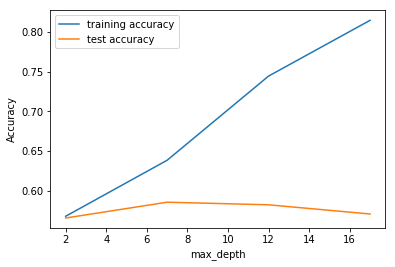

In [24]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
### Tuning min_samples_leaf
#The hyperparameter min_samples_leaf is the minimum number of samples required to be at a leaf node:

#If int, then consider min_samples_leaf as the minimum number.


In [27]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(x_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [28]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_min_samples_leaf,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.168370,0.003661,0.584778,0.623227,100,{'min_samples_leaf': 100},2,0.586986,0.623105,0.584247,...,0.590271,0.620483,0.577938,0.624251,0.584447,0.623480,0.001953,0.000119,0.004055,0.001496
1,0.156121,0.003771,0.588888,0.613996,150,{'min_samples_leaf': 150},1,0.594863,0.612572,0.584247,...,0.593354,0.610464,0.579651,0.616801,0.592326,0.617315,0.006868,0.000189,0.005905,0.002636
2,0.141985,0.003709,0.580256,0.608635,200,{'min_samples_leaf': 200},5,0.579452,0.611287,0.574315,...,0.582049,0.605069,0.581021,0.609608,0.584447,0.606439,0.004264,0.000217,0.003385,0.002453
3,0.137067,0.003907,0.583134,0.600140,250,{'min_samples_leaf': 250},3,0.585616,0.599983,0.580822,...,0.584789,0.600017,0.577252,0.602929,0.587187,0.600531,0.004647,0.000581,0.003613,0.001809
4,0.127006,0.003397,0.578064,0.599541,300,{'min_samples_leaf': 300},6,0.579452,0.598270,0.574315,...,0.578965,0.598990,0.573827,0.601987,0.583762,0.599760,0.002359,0.000166,0.003666,0.001316


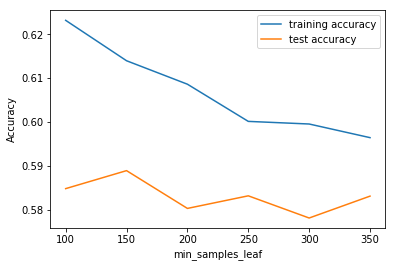

In [29]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
#You can see that the model starts of overfit as you decrease the value of min_samples_leaf.

In [ ]:
# Grid Search to Find Optimal Hyperparameters
#We can now find the optimal hyperparameters using GridSearchCV.

In [30]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [31]:
# Fit the grid search to the data
grid_search.fit(x_train_pca, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  3.8min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [32]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.5901212577926971 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [ ]:
#Fitting the final model with the best parameters obtained from grid search.

In [33]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=200)

In [34]:
# fit
rfc.fit(x_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
# predict
predictions = rfc.predict(x_test_pca)
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.52      0.46      0.49      2630
          1       0.64      0.70      0.67      3627

avg / total       0.59      0.60      0.59      6257



In [39]:
print(confusion_matrix(y_test,predictions))

[[1204 1426]
 [1090 2537]]


In [ ]:
# As we seen above we have acheived 59% of accuracy after tuning the hyperparameters. 